In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def matprint(mat, fmt="g"):
    """
    Pour une un print plus clair de la matrice
    https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75
    """
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

Créons des données synthétiques gaussiennes. Ici nous nous intéresserons dans un premier temps au cas où $m=2$. (Binary MTL Supervised Principal Component Analysis) 

In [3]:
# inutile, puisque la première étape consiste à calculer les moyennes empiriques
# enfait si c'est quand même utile pour générer les données X

def mean_matrix(m, k, p, l, h):
    """
    Retourne une matrice M de taille pxm*k contenant
    les moyennes de chaque composante de chaque vecteur aléatoire
    pour l'instant les moyennes sont tirées aléatoirement 
    suivant la loi uniforme sur l, h (pas convaincu par ce choix)
    m est le nombre de classes
    k est le nombre de taches
    p est le nombre de features
    """
    np.random.seed(55)
    M = []
    tmp = []
    for task in range(k):
        tmp = []
        for classe in range(m):
            # on crée un vecteur de moyennes égales pour chaque classes
            # de sorte à créer des classes gravitant autour d'une meme moyenne
            tmp.append(np.ones((p,1))*np.random.uniform(low = 0.0, high = 1.0))
        M.append(tmp)
    return M

In [4]:
# Test
n_t = [[100,100], [100,100], [100,100], [100,100]]
n = 800
p = 20
m = 2
t = 2
# 2 taches, 2 classes, p = 20
M = mean_matrix(m, t, p, 0., 2.)
print(M)

# pour plusieurs taches
# M = mean_matrix(2, 3, 10, 0., 2.)
# print(M)

[[array([[0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829],
       [0.09310829]]), array([[0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592],
       [0.97165592]])], [array([[0.48385998],
       [0.48385998],
       [0.48385998],
       [0.48385998],
       [0.48385998],
       [0.48385998],
       [0.48385998],
     

In [5]:
def gaussian_synthetic_data(n, p, m, t, n_t, M):
    """
    Renvoie un tableau de données synthétiques gaussiennes. X[0] accède aux données de la premiere tache.
    X[0][1] accede aux données de la deuxieme classe de la premiere tache.
    (vecteurs gaussiens de taille n_j * p tq sum(n_j for j) = n)
    à partir du nombre d'échantillons n de taille p et du nombre de classe m.
    t est le nombre de tâches
    n_t est un vecteur comprenant les différentes valeurs n_j pour chaque task
    M est la matrice des moyennes de chaque composante 
    de chaque vecteur aléatoire
    """
    # assert(sum(n_j)/n==1
    np.random.seed(55)
    X = []
    tmp = []
    for task in range(t):
        # pour une tache on a m classes
        tmp = []
        for k in range(m):
            X_k = np.empty((n_t[task][k], p))
            # on prendra la transposée a la fin
            #print( n_t[task][k])
            for j in range(n_t[task][k]):
                # on crée n_j[task][k] vecteurs aléatoires de taille 1xp
                # std = 1?
                X_k[j] = np.random.normal(M[task][k][0], 1, size=(1, p))
                # indice 0 parce que c'est toujours la meme moyenne dans M (pour l'instant ?)
            X_k = np.transpose(X_k)
            #print(k)
            tmp.append(X_k)
            # print("tmp = ", tmp)
        X.append(tmp)
            
    return X

In [8]:
# Test 
X = gaussian_synthetic_data(n, p, m, t, n_t, M)
X

[[array([[-1.53062283, -1.28899445, -0.54953049, ..., -0.69304351,
          -0.26148744, -0.31801429],
         [-0.00867565, -0.90034635, -0.71008325, ..., -0.5454225 ,
          -1.22887874,  1.24980071],
         [-1.71668281, -0.0763576 ,  0.99169746, ..., -0.16034256,
          -0.15677109,  0.79994033],
         ...,
         [ 0.79546019,  0.88833412, -0.63493506, ...,  0.06933942,
          -0.09249312, -1.03226742],
         [ 0.98149013, -1.47808587,  0.00576858, ..., -0.17524952,
          -1.13554115,  0.85082346],
         [ 0.81532809, -1.06667849,  1.3915269 , ..., -0.35618595,
           1.17381271,  1.15548296]]),
  array([[ 0.80606558,  1.91934994, -1.09468132, ...,  1.78877157,
           2.22004792,  2.3642421 ],
         [ 0.25491674,  2.23307828,  1.07241878, ...,  1.25261133,
           1.35528653,  1.34455153],
         [-0.49400862,  0.9793958 ,  0.06961894, ...,  2.59109694,
           0.73316318,  1.44336337],
         ...,
         [ 0.87415051,  0.82140651

In [7]:
# normalisation des données pour chaque tâche

# inutile

from sklearn.preprocessing import normalize
for i in range(len(X)):
    for k in range(len(X[i])):
        X[i][k] = normalize(X[i][k])


X est une matrice de taille $p\times n$, avec $p=20$, le nombre de features, et $n=80$. $c_0=1/4$

Il faut aussi créer le vecteur $\tilde{y}\in\mathbb{R}^{2k}$, qui contiendra les labels associées aux données.

In [9]:
def create_labels(nb_tasks, nb_classes):
    """
    Crée le vecteurs y_tilde contenant les labels associés aux données.
    Ici on le fait pour deux 2 tâches et pour deux classes.
    """
    y = np.empty((nb_classes*nb_tasks))
    for t in range(0, nb_classes*nb_tasks-1, 2):
        y[t] = -1
        y[t+1] = 1
        
    return y

In [10]:
y = create_labels(2,2)
#print(y)

In [ ]:
train_set, test_set = train_test_split(X, test_size=0.2, random_state=42)
# découpe pas comme je le veux 

In [ ]:
train_set[0]

## 1ère etape
Calcul des moyennes empiriques, et calcul de la matrice $M\in\mathbb{R}^{p\times 2k}$

In [140]:
np.transpose(np.ones((n_t[1][1], 1)))
X[1][1].shape

(20, 100)

In [17]:
# pas fait le cas du j=j' mais j'ai pas l'impression que c'est nécessaire en tout cas pas ici ?

def empirical_mean(nb_tasks, nb_classes, X, p, n_t):
    """
    compute empirical mean for data X
    return an 1xp vector being the empirical mean for the random vector X_{tj}
    retourne la matrice M
    """
    M = np.empty((nb_classes*nb_tasks, p))
    for t in range(nb_tasks):
        for l in range(nb_classes):
            #print(X[t][l].dot(np.ones((n_t[t][l]))).shape)
            # print(t*nb_classes+l)
            M[t*nb_classes+l] = X[t][l].dot(np.ones((n_t[t][l])))
            M[t*nb_classes+l] /= n_t[t][l]
            print(f"class {t*nb_classes+l} empirical mean = {np.mean(M[t*nb_classes+l])}")
    return np.transpose(M)

In [18]:
M_mean = empirical_mean(2, 2, X, p, n_t)
matprint(M_mean)
#print(M)
# la premiere moyenne du vecteur mu_{11} est bizarre puisqu'on devrait se rapprocher 0.97 ah non c'est bon enfait 

class 0 empirical mean = 0.10269756940790972
class 1 empirical mean = 0.991108749909227
class 2 empirical mean = 0.4950598584697935
class 3 empirical mean = 0.2421534514433296
  0.182699   1.06967  0.483733  0.0736078  
 0.0163268   1.02035   0.45356   0.151434  
 0.0976678   1.10747  0.481081   0.332247  
  0.124627  0.966628  0.710325   0.432174  
 0.0684938   1.09044  0.408631  0.0651199  
  0.112691  0.831602  0.618425   0.188997  
  0.192282  0.973948   0.52177   0.368502  
  0.203196   1.00957  0.448227   0.281191  
-0.0995654   1.01232  0.333477   0.215661  
 -0.016813  0.986572  0.448624   0.226877  
  0.126558   0.94448  0.503978   0.195808  
 0.0470105  0.832099  0.408064   0.397331  
 0.0493442   1.17375  0.510282   0.374944  
  0.092401  0.828034  0.405676   0.273992  
 0.0416406  0.951052  0.554584   0.192112  
  0.195302     1.064  0.516971   0.325644  
  0.151426  0.897434  0.435352     0.2222  
  0.200537   1.04774  0.577451    0.14556  
  0.238924  0.956396  0.480691  

In [19]:
# utile pour les puissances négatives
def power_diagonal_matrix(D, exponent):
    diag = np.zeros(len(D))
    for i in range(len(D)):
        diag[i] = D[i][i]**exponent
    
    return np.diag(diag)

## 2ème étape
Estimer $c$ et $\mathcal{M}\in\mathbb{R}^{2k\times 2k}$. 
$c=\left[ c_{11},\ldots,c_{km} \right]^T\in\mathbb{R}^{km}$

In [20]:
def estimate_c(n_t, n, nb_tasks, nb_classes):
    c = np.empty(nb_tasks*nb_classes)
    for task in range(nb_tasks):
        for m in range(nb_classes):
            c[task*nb_classes+m]=n_t[task][m]/n
            
    return c

In [21]:
c = estimate_c(n_t, n, t, m)
print(f"c = {c}T")
Dc = np.diag(c)
Dc

c = [0.125 0.125 0.125 0.125]T


array([[0.125, 0.   , 0.   , 0.   ],
       [0.   , 0.125, 0.   , 0.   ],
       [0.   , 0.   , 0.125, 0.   ],
       [0.   , 0.   , 0.   , 0.125]])

In [30]:
def compute_M_cal(n,p,Dc,M):
    """
    renvoie la matrice M cursive estimée
    """
    c0 = p/n
    return 1/c0*np.power(Dc, 1/2).dot(np.transpose(M)).dot(M).dot(np.power(Dc, 1/2))

1.77361  10.1503  5.31713  2.44819  
10.1503  99.0779  49.0961  23.9244  
5.31713  49.0961  25.2273   12.193  
2.44819  23.9244   12.193  6.92135  


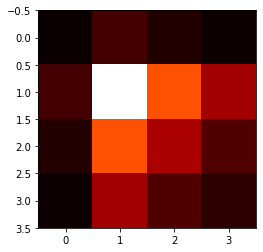

In [31]:
correlation_matrix = compute_M_cal(n,p,Dc,M_mean)
matprint(correlation_matrix)
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.show()

Cette cmap est bizarre, mais peut-être que c'est bon je sais pas.

## 3ème étape
Let's compute optimal labels

In [32]:
def label_evaluation(nb_tasks, nb_classes, Dc, M_estimated):
    """
    Evalue le label y pour une tache t et une classe l donnée
    Comme ca qu'il faut écrire e_t1 ?
    """
    inverse = np.linalg.inv(M_estimated+np.identity(nb_classes*nb_tasks))
    power_dc = power_diagonal_matrix(Dc, -1/2)
    et1_et2 = np.zeros((nb_tasks*nb_classes,1))
    for t in range(nb_tasks):
        et1_et2[t*nb_classes] = 1
        et1_et2[t*nb_classes+1] = -1
    #matprint(et1_et2)
    y = power_dc.dot(inverse).dot(M_estimated).dot(power_dc).dot(et1_et2)
    return y

In [34]:
y = label_evaluation(t,m,Dc,correlation_matrix)
print("optimal labels for a 2-task 2-class example with synthetic gaussian data : ")
matprint(y)
#y.shape

optimal labels for a 2-task 2-class example with synthetic gaussian data : 
 4.01949  
-5.63164  
 2.20718  
-3.99624  


## 4ème étape
Estimation des $m_{tj}$, étant les $k\times m$ moyennes estimées pour modéliser nos données.

In [35]:
def asymptotic_mean(nb_tasks, nb_classes, y_tilde, Dc, correlation_matrix, t, j):
    """
    compute asymptotic mean m_tj
    t current task
    j current class
    """
    y_transpose = np.transpose(y_tilde)
    etj = np.zeros((nb_tasks*nb_classes, 1))
    etj[t*nb_classes+j] = 1
    power_dc = power_diagonal_matrix(Dc, -1/2)
    m_tj = y_transpose.dot(np.power(Dc, 1/2)).dot(correlation_matrix).dot(power_dc).dot(etj)
    m_tj /= np.sqrt(y_transpose.dot(np.power(Dc, 1/2).dot(correlation_matrix).dot(np.power(Dc, 1/2)) + Dc).dot(y_tilde))
    np.reshape(m_tj, 1)
    return m_tj[0][0]

In [36]:
for k in range(t):
    for l in range(m):
        print(f"m_kl = {asymptotic_mean(t, m, y, Dc, correlation_matrix, k, l)}")

m_kl = -2.631653642228215
m_kl = -27.60823949705744
m_kl = -13.582783544105135
m_kl = -6.876692711545298


Les valeurs ont l'air particulièrement grandes par rapport aux moyennes empiriques trouvées.

## 5ème étape
Calcul de $V$ le sous-espace engendrés par les $\tau$ plus grands vecteurs propres. Dans le cas du binary MTL-SPCA, $V=\frac{Xy}{\lVert Xy \rVert}$ de rang 1

In [37]:
def compute_V(y_tilde, X):
    xy_product = X.dot(y_tilde)
    return xy_product/np.linalg.norm(xy_product)

In [38]:
# la facon dont j'ai structuré X m'oblige à créer une fonction pour agréger X en un seul array de taille nxp

In [235]:
V = compute_V(y, np.array(X))

ValueError: shapes (2,2,20,100) and (4,1) not aligned: 100 (dim 3) != 4 (dim 0)

In [15]:
# inutile

def estimate_M(nb_task, nb_classes, n_j, X):
    """
    Permet d'estimer M à partir des données X
    """
    M_coef = 0.0
    M = np.empty((nb_classes*nb_task, nb_classes*nb_task))
    for k in range(nb_task):
        for j in range(nb_classes):
            for j_prime in range(nb_classes):
                if j==j_prime:
                    #print(np.transpose(X[k][j][0], (np.int(n_j[k][j]/2),1)))
                    #print(X[k][j][:np.int(n_j[k][j]/2)])
                    # 1x2 x 2x8 x 8x2 x 2x1 = 1x1
                    M_coef = np.transpose(np.ones((np.int(n_j[k][j]/2), 1))).dot(np.transpose(X[k][j])[:np.int(n_j[k][j]/2)]).dot(np.transpose(np.transpose(X[k][j])[np.int(n_j[k][j]/2):np.int(n_j[k][j])])).dot(np.ones(np.int(n_j[k][j_prime]/2)))
                else:                       
                    #print(np.ones((n_j[k][j], 1)))
                    #print(np.transpose(np.ones((n_j[k][j], 1))))
                    #print(np.transpose(X[k][j]))
                    M_coef = np.transpose(np.ones((n_j[k][j], 1))).dot(np.transpose(X[k][j])).dot(X[k][j_prime]).dot(np.ones(n_j[k][j_prime]))
                M[j][j_prime] = M_coef
                
    return M

Compute the classification score

In [90]:
def compute_score(y, J, X, x):
    """
    x vecteur aléatoire que l'on veut classifier
    """
    return np.transpose(y).dot(np.transpose(J)).dot(np.transpose(X)).dot(x)/np.linalg.norm(y.dot(np.transpose(J).dot(np.tranpose(X))))

In [93]:
def create_J(nb_classes, nb_tasks, t, j):
    J = np.zeros((nb_classes, nb_tasks))
    J[t][j] = 1
    return J

In [96]:
J = create_J(m, t, 0, 0)
matprint(J)
x = np.random.normal(0, 1, size=(p,1))
compute_score(y, J, X, x)

1  0  0  0  
0  0  0  0  


ValueError: shapes (8,8) and (4,2) not aligned: 8 (dim 1) != 4 (dim 0)